### **About NetFlix**

Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages.

They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally.

This particular business case focuses on the Netflix show data and provides insightful information on 8807 shows.




**Business case study of Netflix data is as follows:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("netflix_titles.csv")

**Basic analysis:**
* Checking for column header names, Nan values and datatypes of columns.
* Sanity Check for data.
* Replacing Nan values with Unknown.

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


As we can see columns **director, cast** and **country** have many null values.

In [ ]:
# Null value Percentage fro every attribute
((df.isna().sum())/len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

For almost 30% of data, director information is missing. For cast and country, almost 10% infomation is missing.

In [ ]:
for i in df.columns:
 print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

Netflix platform has short movies too. Duration of some movies is even less than or 5 minutes.

In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Some of the movies duration is wrongly entered as rating.

In [ ]:
# replacing duration with
df["duration"] = df["rating"].where(df["rating"].isin(["74 min", "84 min", "66 min"]), df["duration"])

In [ ]:
df[df["rating"].isin(["74 min", "84 min", "66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.iloc[5541]

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                     74 min
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

In [ ]:
df.iloc[5794]

show_id                                                     s5795
type                                                        Movie
title                                       Louis C.K.: Hilarious
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                     September 16, 2016
release_year                                                 2010
rating                                                     84 min
duration                                                   84 min
listed_in                                                  Movies
description     Emmy-winning comedy writer Louis C.K. brings h...
Name: 5794, dtype: object

In [ ]:
df.iloc[5813]

show_id                                                     s5814
type                                                        Movie
title                        Louis C.K.: Live at the Comedy Store
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                        August 15, 2016
release_year                                                 2015
rating                                                     66 min
duration                                                   66 min
listed_in                                                  Movies
description     The comic puts his trademark hilarious/thought...
Name: 5813, dtype: object

In [ ]:
df["rating"] = df["rating"].where(~df["rating"].isin(["74 min", "84 min", "66 min"]),"Unknown")

In [ ]:
df.iloc[5541]

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                    Unknown
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

In [ ]:
df.iloc[5794]

show_id                                                     s5795
type                                                        Movie
title                                       Louis C.K.: Hilarious
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                     September 16, 2016
release_year                                                 2010
rating                                                    Unknown
duration                                                   84 min
listed_in                                                  Movies
description     Emmy-winning comedy writer Louis C.K. brings h...
Name: 5794, dtype: object

In [ ]:
df.iloc[5813]

show_id                                                     s5814
type                                                        Movie
title                        Louis C.K.: Live at the Comedy Store
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                        August 15, 2016
release_year                                                 2015
rating                                                    Unknown
duration                                                   66 min
listed_in                                                  Movies
description     The comic puts his trademark hilarious/thought...
Name: 5813, dtype: object

In [ ]:
df["director"]=df["director"].fillna("Unknown")
df["cast"]=df["cast"].fillna("Unknown")
df["country"]=df["country"].fillna("Unknown")
df["rating"]=df["rating"].fillna("Unknown")
df["duration"]=df["duration"].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Univariate Analyis:

 To perform exploratory analysis, following steps are followed:
* Splitting the attributes director, cast, country and listed_in.
* Removing white spaces using strip ( ) , if any, from director, country, cast and listed_in.
* Using explode ( ) , elements in list for a single row are distributed over multiple rows.
* While doing EDA, the missing values are not accounted as they do not provide any insights.

In [ ]:
df["director"]=df["director"].str.split(",")
df["country"]=df["country"].str.split(",")
df["cast"]=df["cast"].str.split(", ")
df["listed_in"]=df["listed_in"].str.split(", ")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."


In [ ]:
df["director"].head(20)

0                                    [Kirsten Johnson]
1                                            [Unknown]
2                                    [Julien Leclercq]
3                                            [Unknown]
4                                            [Unknown]
5                                      [Mike Flanagan]
6                     [Robert Cullen,  José Luis Ucha]
7                                       [Haile Gerima]
8                                    [Andy Devonshire]
9                                     [Theodore Melfi]
10                                           [Unknown]
11                                 [Kongkiat Komesiri]
12                               [Christian Schwochow]
13                                     [Bruno Garotti]
14                                           [Unknown]
15                                           [Unknown]
16    [Pedro de Echave García,  Pablo Azorín Williams]
17                                           [Unknown]
18        

In [ ]:
def strip(l):
  return [item.strip() for item in l]

df["director"] = df["director"].apply(strip)
df["country"] = df["country"].apply(strip)
df["cast"]=df["cast"].apply(strip)
df["listed_in"]=df["listed_in"].apply(strip)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."


In [ ]:
df["country"].head(20)

0                                       [United States]
1                                        [South Africa]
2                                             [Unknown]
3                                             [Unknown]
4                                               [India]
5                                             [Unknown]
6                                             [Unknown]
7     [United States, Ghana, Burkina Faso, United Ki...
8                                      [United Kingdom]
9                                       [United States]
10                                            [Unknown]
11                                            [Unknown]
12                            [Germany, Czech Republic]
13                                            [Unknown]
14                                            [Unknown]
15                                      [United States]
16                                            [Unknown]
17                                             [

In [ ]:
df_director=df.explode("director")
df_director.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."


In [ ]:
df_country=df.explode("country")
df_country.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."


In [ ]:
df_cast=df.explode("cast")
df_cast.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],Ama Qamata,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."


In [ ]:
df_listed =df.explode("listed_in")
df_listed.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#  Tv shows are prefrred or movies:
df.groupby("type").title.count().sort_values(ascending=False)

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

In [ ]:
df_type=df.groupby("type").title.nunique().sort_values(ascending=False).reset_index()
df_type

,type,title
0,Movie,6131
1,TV Show,2676


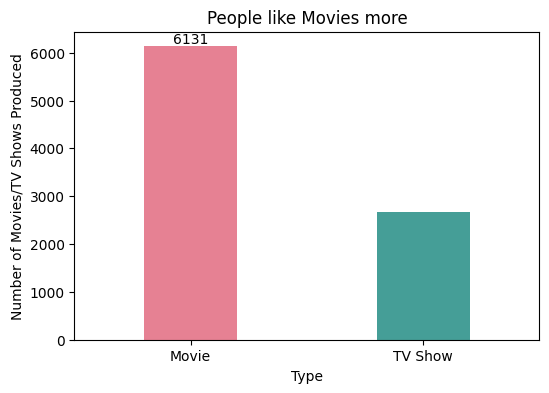

In [ ]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x="type",y="title",data=df_type,width=0.4,palette="husl")
ax.bar_label(ax.containers[0])
plt.xlabel("Type")
plt.ylabel("Number of Movies/TV Shows Produced")
plt.xticks(fontsize=10)
plt.title("People like Movies more")
plt.show()

In [ ]:
df_director.director.value_counts()

director
Unknown           2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: count, Length: 4994, dtype: int64

**Name: count, Length: 4994, dtype: int64** shows there are 4994 directord listed in dataset.

In [ ]:
df_director = ((df_director.director.value_counts().head(20))[1:]).reset_index()
df_director

,director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


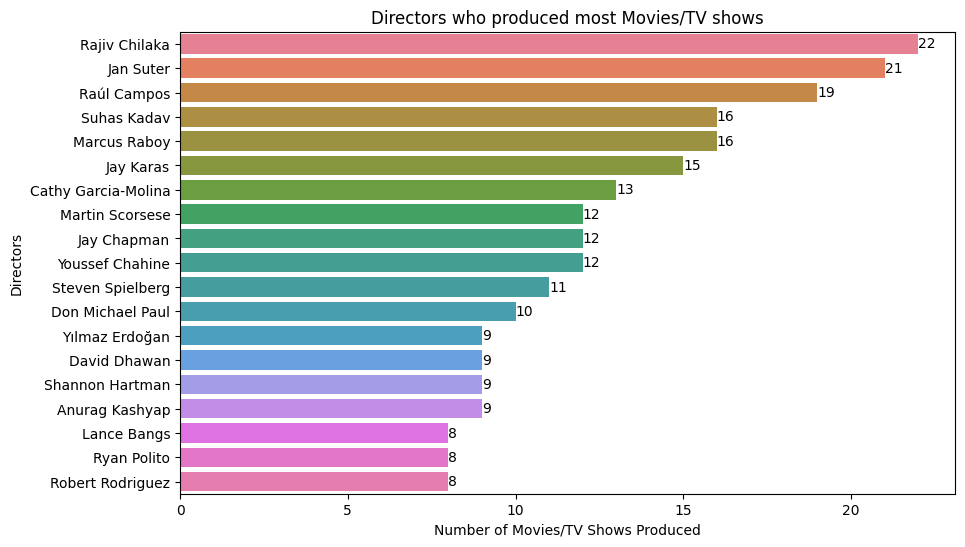

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y="director",x="count",data=df_director,palette="husl")
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Directors")
plt.xlabel("Number of Movies/TV Shows Produced")
plt.xticks(fontsize=10)
plt.title("Directors who produced most Movies/TV shows")
plt.show()

In [ ]:
df_country.country.value_counts()

country
United States     3690
India             1046
Unknown            831
United Kingdom     806
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 124, dtype: int64

**Name: count, Length: 124, dtype: int64** shows dataset has content from 123 countries (excluding unknowns).

In [ ]:
df_country = (df_country.country.value_counts().head(11)).reset_index()
df_country = df_country[df_country["country"]!="Unknown"]
df_country

,country,count
0,United States,3690
1,India,1046
3,United Kingdom,806
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,South Korea,231
9,Germany,226
10,Mexico,169


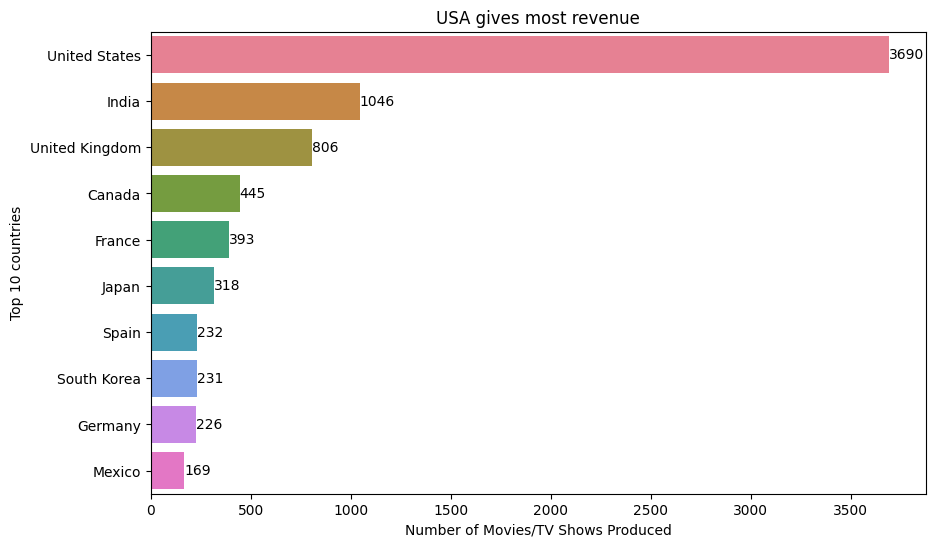

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y="country",x="count",data=df_country,palette="husl")
for container in ax.containers:
  ax.bar_label(container)
plt.ylabel("Top 10 countries")
plt.xlabel("Number of Movies/TV Shows Produced")
plt.title("USA gives most revenue")
plt.show()

Most of the content on Netflix is from USA followed by India and UK. It can be inferred that most of the revenue generation is from USA content.

In [ ]:
df_cast.cast.value_counts()

cast
Unknown                    825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: count, Length: 36440, dtype: int64

**Name: count, Length: 36439, dtype: int64** shows dataset has 36440 actors/actresses listed. Unknown are excluded.

In [ ]:
df_cast = ((df_cast.cast.value_counts().head(11))[1:]).reset_index()
df_cast

,cast,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


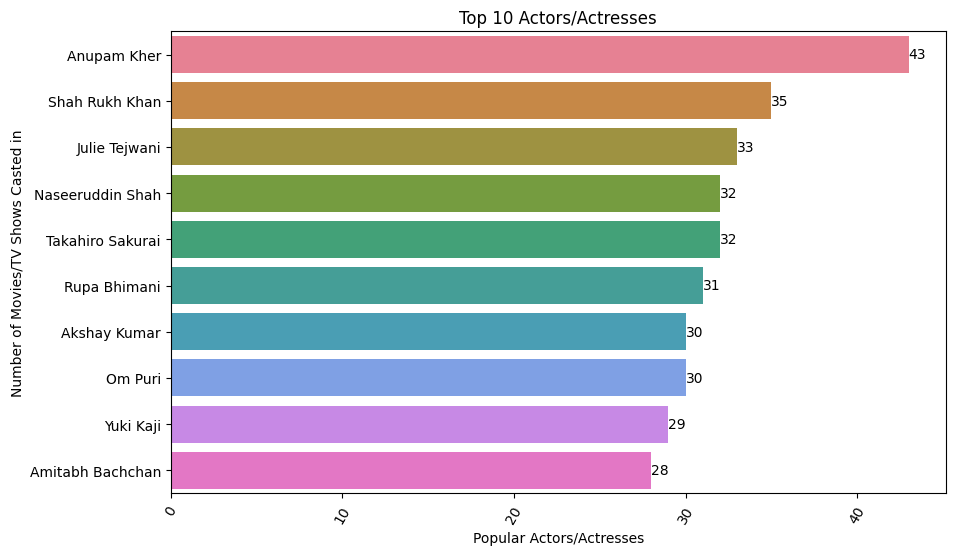

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y="cast",x="count",data=df_cast,palette="husl")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Popular Actors/Actresses")
plt.ylabel("Number of Movies/TV Shows Casted in")
plt.xticks(fontsize=10,rotation=60)
plt.title("Top 10 Actors/Actresses")
plt.show()

In [ ]:
df_listed.listed_in.value_counts()

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

In [ ]:
df_listed_ = (df_listed.listed_in.value_counts().head(10)).reset_index()
df_listed_

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


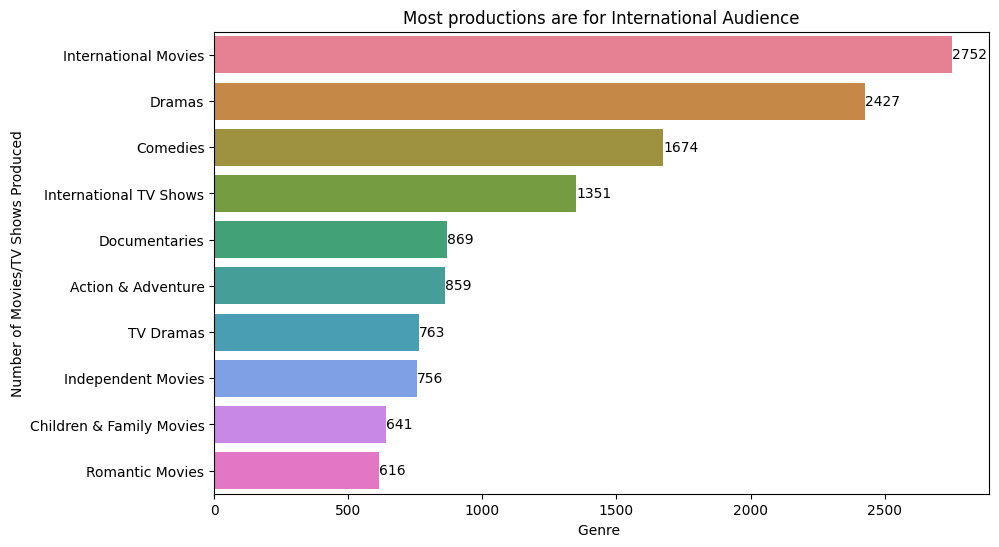

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="count",y="listed_in",data=df_listed_,palette="husl")
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel("Genre ")
plt.ylabel("Number of Movies/TV Shows Produced")
plt.xticks(fontsize=10)
plt.title("Most productions are for International Audience")
plt.show()

In [ ]:
df.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
Unknown        7
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [ ]:
df_rating = (df.rating.value_counts()).reset_index()
df_rating

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


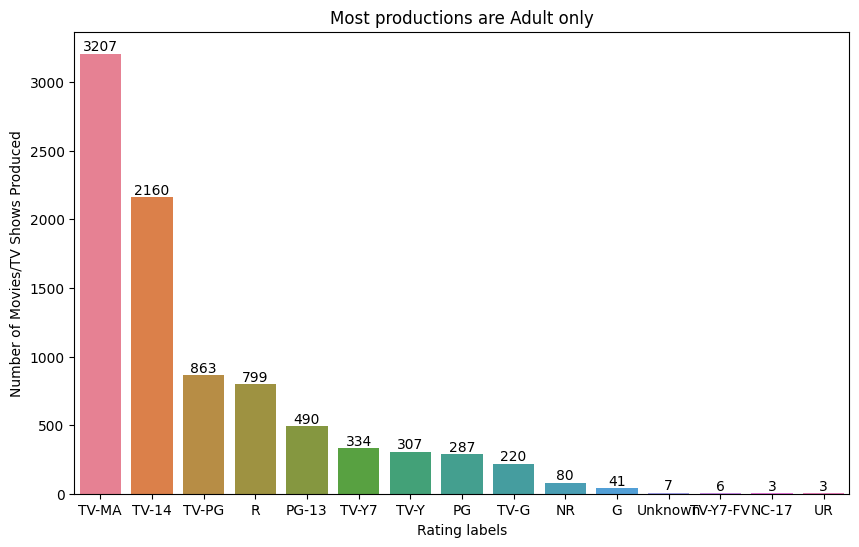

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(y="count",x="rating",data=df_rating, palette="husl")
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel("Rating labels")
plt.ylabel("Number of Movies/TV Shows Produced")
plt.xticks(fontsize=10)
plt.title("Most productions are Adult only")
plt.show()

In [ ]:
df_listed.listed_in

0                  Documentaries
1         International TV Shows
1                      TV Dramas
1                   TV Mysteries
2                 Crime TV Shows
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: listed_in, Length: 19323, dtype: object

0               Documentaries
1        InternationalTVShows
1                    TVDramas
1                 TVMysteries
2                CrimeTVShows
                ...          
8805    Children&FamilyMovies
8805                 Comedies
8806                   Dramas
8806      InternationalMovies
8806           Music&Musicals
Name: listed_in, Length: 19323, dtype: object
0               Documentaries
1        InternationalTVShows
1                    TVDramas
1                 TVMysteries
2                CrimeTVShows
                ...          
8805    Children&FamilyMovies
8805                 Comedies
8806                   Dramas
8806      InternationalMovies
8806           Music&Musicals
Name: listed_in, Length: 19323, dtype: object


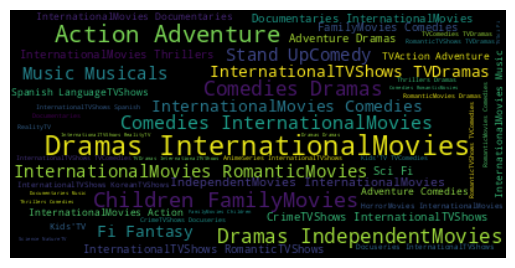

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words=df_listed["listed_in"].str.replace(" ","")
print(words)
words.tolist()
print(words)
word_list=(" ").join(words)

text = word_list

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_date=df.dropna(subset="date_added")


# df_date["date_added"] = df_date.date_added.apply(strip)
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown],"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[Unknown],[Unknown],[Unknown],"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[Unknown],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


In [ ]:
df_date["date"] = pd.to_datetime(df_date["date_added"], format='mixed')
df_date.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021-09-24


In [ ]:
df_date["week_number"]=df_date["date"].dt.isocalendar().week
df_date["year"]=df_date["date"].dt.year
df_date["month"]=df_date["date"].dt.month_name()
df_date_movies =df_date[df_date["type"]=="Movie"]
df_date_TV = df_date[df_date["type"]=="TV Show"]
df_date.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week_number,year,month
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25,38,2021,September
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021-09-24,38,2021,September


In [ ]:
### best week to add movies to netflix
df_date_movies.groupby("week_number").title.nunique().sort_values(ascending=False)

week_number
1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
22    146
48    139
5     135
14    124
16    124
50    119
30    116
11    115
37    114
23    112
39    111
17    109
10    107
7     106
33    105
34    102
25    101
15    100
36     97
49     95
29     94
42     90
28     89
24     89
38     88
43     88
51     86
20     85
47     85
41     84
46     83
3      81
52     80
2      78
21     76
32     73
19     73
8      72
12     67
6      64
45     61
53     61
4      56
Name: title, dtype: int64

In [ ]:
movies_top_weeks=(df_date_movies.groupby("week_number").title.nunique().sort_values(ascending=False)[:10]).reset_index()
movies_top_weeks

,week_number,title
0,1,316
1,44,243
2,40,215
3,9,207
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


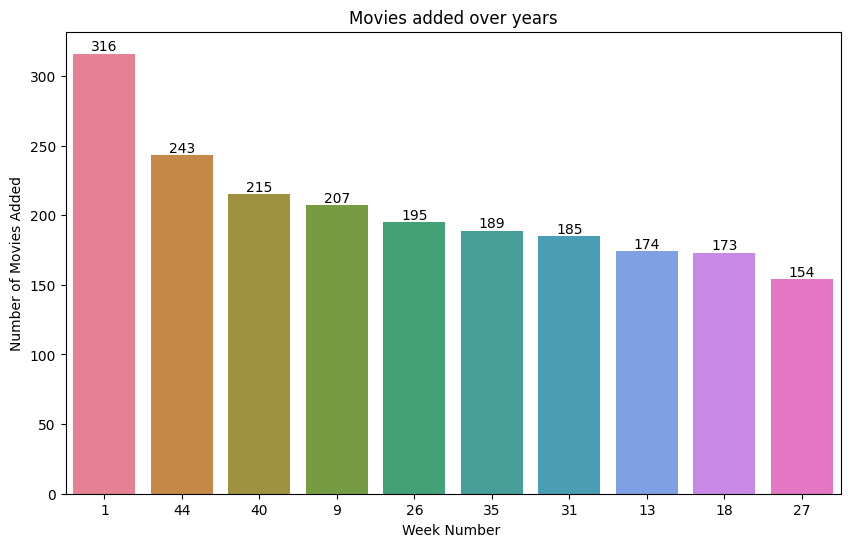

In [ ]:

plt.figure(figsize=(10,6))
ax=sns.barplot(data=movies_top_weeks,x="week_number",y="title",order=movies_top_weeks.week_number,palette="husl")
plt.xlabel("Week Number ")
plt.ylabel("Number of Movies Added")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Movies added over years")
plt.show()

In [ ]:
df_date_TV.groupby("week_number").title.nunique().sort_values(ascending=False)

week_number
27    86
31    83
13    76
44    75
24    75
35    74
5     73
26    73
40    72
50    70
37    69
18    61
48    60
22    60
1     56
39    55
15    52
52    52
51    51
38    51
46    51
32    49
14    49
33    48
11    48
9     47
29    46
20    46
17    45
49    45
36    45
42    45
30    44
53    43
19    43
25    42
12    42
34    41
28    41
7     41
21    41
23    39
8     38
45    37
16    36
47    35
6     33
4     32
3     32
41    32
2     30
10    28
43    28
Name: title, dtype: int64

In [ ]:
Tv_shows_top_weeks=(df_date_TV.groupby("week_number").title.nunique().sort_values(ascending=False)[:10]).reset_index()
Tv_shows_top_weeks

,week_number,title
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,5,73
7,26,73
8,40,72
9,50,70


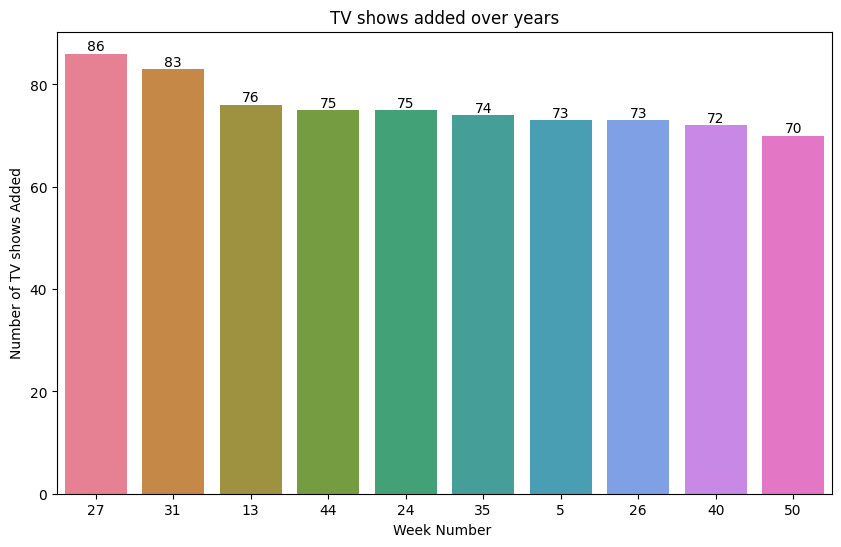

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=Tv_shows_top_weeks,x="week_number",y="title",order=Tv_shows_top_weeks.week_number,palette="husl")
plt.xlabel("Week Number ")
plt.ylabel("Number of TV shows Added")
for container in ax.containers:
    ax.bar_label(container)
plt.title("TV shows added over years")
plt.show()

In [ ]:
df_date_movies.groupby("month").title.nunique().sort_values(ascending=False)

month
July         565
April        550
December     547
January      546
October      545
March        529
August       519
September    519
November     498
June         492
May          439
February     382
Name: title, dtype: int64

In [ ]:
movies_top_month=(df_date_movies.groupby("month").title.nunique().sort_values(ascending=False)).reset_index()
movies_top_month

,month,title
0,July,565
1,April,550
2,December,547
3,January,546
4,October,545
5,March,529
6,August,519
7,September,519
8,November,498
9,June,492


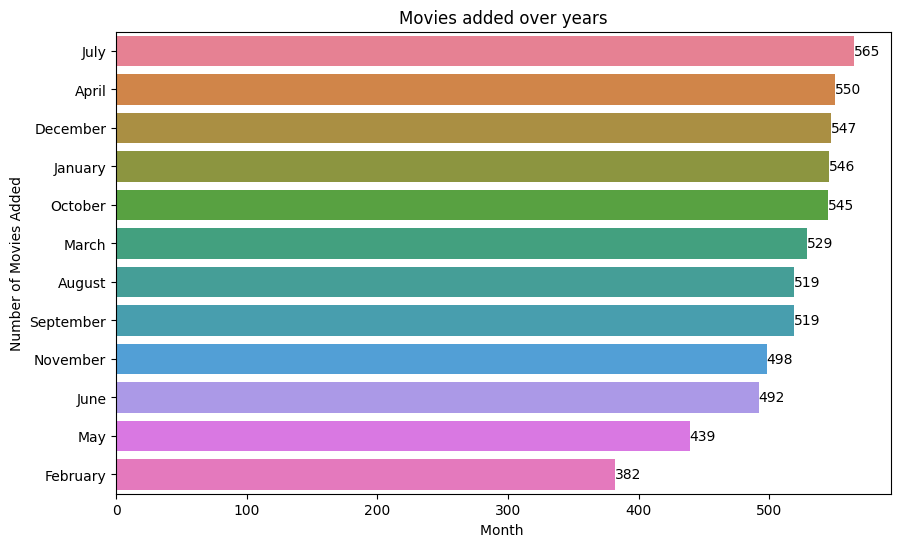

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=movies_top_month,y="month",x="title",order=movies_top_month.month,palette="husl")
plt.xlabel("Month ")
plt.ylabel("Number of Movies Added")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Movies added over years")
plt.show()

In [ ]:
df_date_TV.groupby("month").title.nunique().sort_values(ascending=False)

month
December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     181
Name: title, dtype: int64

In [ ]:
Tv_top_month=(df_date_TV.groupby("month").title.nunique().sort_values(ascending=False)).reset_index()
Tv_top_month

,month,title
0,December,266
1,July,262
2,September,251
3,August,236
4,June,236
5,October,215
6,April,214
7,March,213
8,November,207
9,May,193


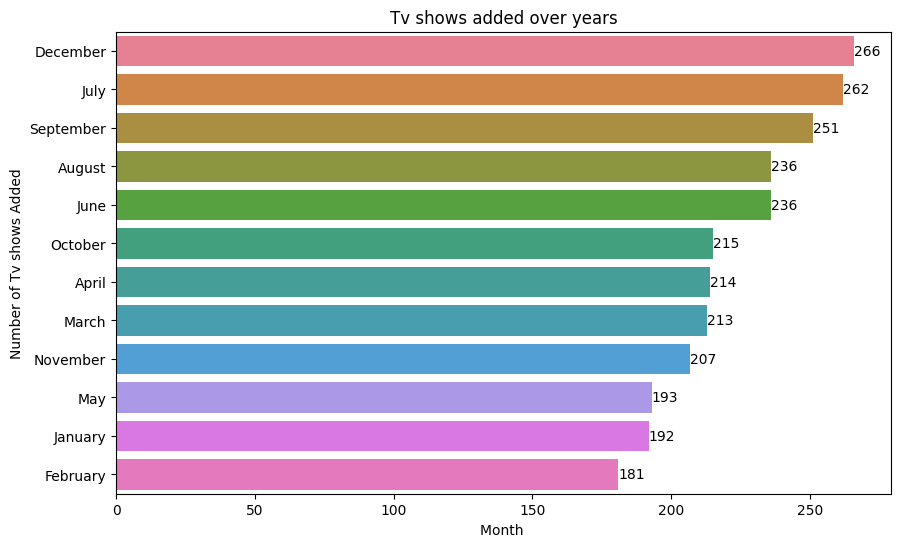

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=Tv_top_month,y="month",x="title",order=Tv_top_month.month,palette="husl")
plt.xlabel("Month ")
plt.ylabel("Number of Tv shows Added")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Tv shows added over years")
plt.show()

In [ ]:
df_date["year"].value_counts()

year
2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

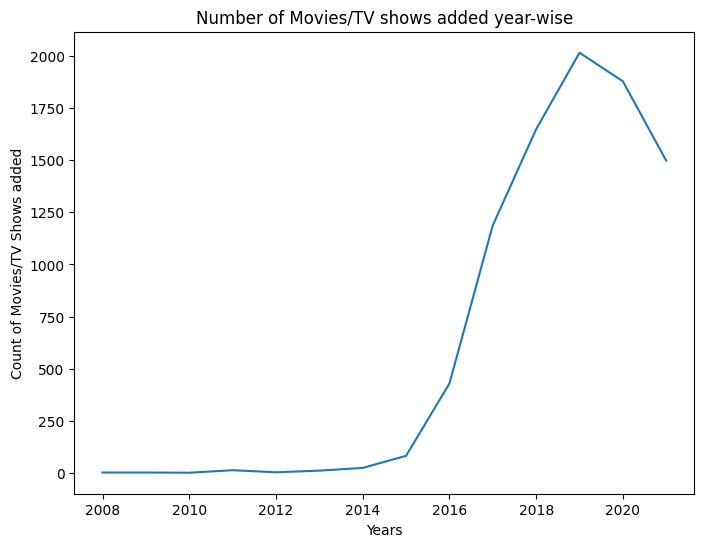

In [ ]:
plt.figure(figsize=(8,6))
year=df_date["year"].value_counts().index
count=df_date["year"].value_counts().values
ax=sns.lineplot(x=year, y=count)
plt.ylabel("Count of Movies/TV Shows added")
plt.xlabel("Years")
plt.title("Number of Movies/TV shows added year-wise")
plt.show()

<Axes: xlabel='type', ylabel='count'>

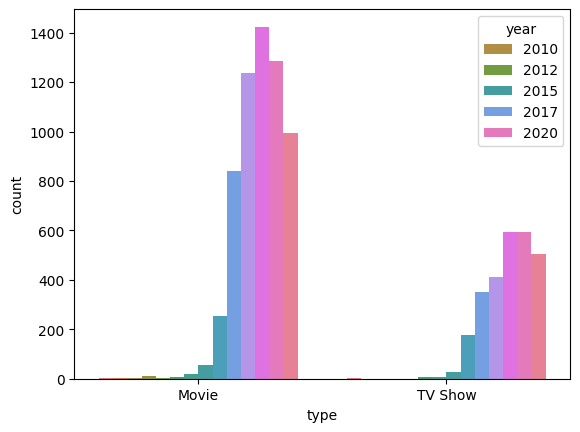

In [ ]:
sns.countplot(data=df_date,x="type",hue="year",palette="husl")

In [ ]:
df_date["year_diff"]=df_date["year"]-df_date["release_year"]

In [ ]:
df_movies=df_date[df_date["type"]=="Movie"]
df_tv=df_date[df_date["type"]=="TV Show"]

In [ ]:
df_movies.year_diff.aggregate(["min","max","mean"])

min     -1.000000
max     75.000000
mean     5.727777
Name: year_diff, dtype: float64

In [ ]:
df_movies[df_movies["year_diff"]<0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week_number,year,month,year_diff
5394,s5395,Movie,Hans Teeuwen: Real Rancour,[Doesjka van Hoogdalem],[Hans Teeuwen],[Netherlands],"July 1, 2017",2018,TV-MA,86 min,[Stand-Up Comedy],Comedian Hans Teeuwen rebels against political...,2017-07-01,26,2017,July,-1
7063,s7064,Movie,Incoming,[Eric Zaragosa],"[Scott Adkins, Aaron McCusker, Vahldin Prelic,...","[Serbia, United States]","October 26, 2018",2019,TV-MA,89 min,"[Action & Adventure, Sci-Fi & Fantasy]",When an imprisoned terrorist cell hijacks a hi...,2018-10-26,43,2018,October,-1


These two movies have wrong release date added to dataset.

In [ ]:
df_tv.year_diff.aggregate(["min","max","mean"])

min     -3.0000
max     93.0000
mean     2.2982
Name: year_diff, dtype: float64

In [ ]:
df_tv[df_tv["year_diff"]<0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,week_number,year,month,year_diff
1551,s1552,TV Show,Hilda,[Unknown],"[Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nels...","[United Kingdom, Canada, United States]","December 14, 2020",2021,TV-Y7,2 Seasons,[Kids' TV],"Fearless, free-spirited Hilda finds new friend...",2020-12-14,51,2020,December,-1
1696,s1697,TV Show,Polly Pocket,[Unknown],"[Emily Tennant, Shannon Chan-Kent, Kazumi Evan...","[Canada, United States, Ireland]","November 15, 2020",2021,TV-Y,2 Seasons,[Kids' TV],After uncovering a magical locket that allows ...,2020-11-15,46,2020,November,-1
2920,s2921,TV Show,Love Is Blind,[Unknown],"[Nick Lachey, Vanessa Lachey]",[United States],"February 13, 2020",2021,TV-MA,1 Season,"[Reality TV, Romantic TV Shows]",Nick and Vanessa Lachey host this social exper...,2020-02-13,7,2020,February,-1
3168,s3169,TV Show,Fuller House,[Unknown],"[Candace Cameron Bure, Jodie Sweetin, Andrea B...",[United States],"December 6, 2019",2020,TV-PG,5 Seasons,[TV Comedies],The Tanner family’s adventures continue as DJ ...,2019-12-06,49,2019,December,-1
3287,s3288,TV Show,Maradona in Mexico,[Unknown],[Diego Armando Maradona],"[Argentina, United States, Mexico]","November 13, 2019",2020,TV-MA,1 Season,"[Docuseries, Spanish-Language TV Shows]","In this docuseries, soccer great Diego Maradon...",2019-11-13,46,2019,November,-1
3369,s3370,TV Show,BoJack Horseman,[Unknown],"[Will Arnett, Aaron Paul, Amy Sedaris, Alison ...",[United States],"October 25, 2019",2020,TV-MA,6 Seasons,[TV Comedies],Meet the most beloved sitcom horse of the '90s...,2019-10-25,43,2019,October,-1
3433,s3434,TV Show,The Hook Up Plan,[Unknown],"[Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, ...",[France],"October 11, 2019",2020,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...","When Parisian Elsa gets hung up on her ex, her...",2019-10-11,41,2019,October,-1
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,[Unknown],"[Ellie Kemper, Jane Krakowski, Tituss Burgess,...",[United States],"May 30, 2018",2019,TV-14,4 Seasons,[TV Comedies],When a woman is rescued from a doomsday cult a...,2018-05-30,22,2018,May,-1
4845,s4846,TV Show,Arrested Development,[Unknown],"[Jason Bateman, Portia de Rossi, Will Arnett, ...",[United States],"May 29, 2018",2019,TV-MA,5 Seasons,[TV Comedies],It's the Emmy-winning story of a wealthy famil...,2018-05-29,22,2018,May,-1
5658,s5659,TV Show,Sense8,[Unknown],"[Tuppence Middleton, Brian J. Smith, Doona Bae...",[United States],"December 23, 2016",2018,TV-MA,2 Seasons,"[Crime TV Shows, TV Dramas, TV Mysteries]","From the creators of ""The Matrix"" and ""Babylon...",2016-12-23,51,2016,December,-2


release_date may be the release year for latest season of Tv Show and date_added may be date for the first addition of the show to the Netflix. It may because of that, the added_date is older than release_date.

In [ ]:
df_movies[df_movies["year_diff"]==0].title.count()

1862

In [ ]:
df_movies[df_movies["year_diff"]==1].title.count()

1178

In [ ]:
df_movies[(df_movies["year_diff"]<10) & (df_movies["year_diff"]>1)].title.count()

1897

In [ ]:
df_movies[df_movies["year_diff"]>50].title.count()

46

In [ ]:
df_movies_ = df[df["type"]=="Movie"]
df_movies_["duration"] = df_movies_.duration.str.split(" ")
df_movies_.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,"[90, min]",[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[Unknown],"September 24, 2021",2021,PG,"[91, min]",[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...


In [ ]:
df_tv_ = df[df["type"]=="TV Show"]
df_tv_["duration"] = df_tv_.duration.str.split(" ")
df_tv_.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,"[2, Seasons]","[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown],"September 24, 2021",2021,TV-MA,"[1, Season]","[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...


In [ ]:
def get_first_duration(lst):
  # Assuming all lists have at least one element (handle empty lists if needed)
  return int(lst[0])

df_movies_['duration'] = df_movies_['duration'].apply(get_first_duration)
df_movies_.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown],[United States],"September 25, 2021",2020,PG-13,90,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[Unknown],"September 24, 2021",2021,PG,91,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...


In [ ]:
df_tv_['duration'] = df_tv_['duration'].apply(get_first_duration)
df_tv_.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,[Unknown],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown],"September 24, 2021",2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...


In [ ]:
df_movies_.duration.max()

312

In [ ]:
df_movies_.duration.aggregate(["min","max","mean"])

min       3.000000
max     312.000000
mean     99.564998
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

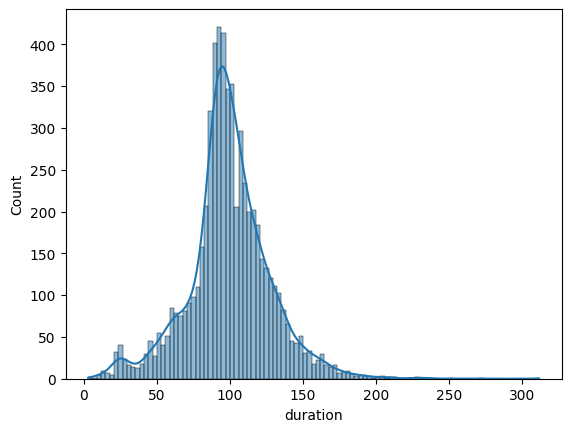

In [ ]:
sns.histplot(data=df_movies_,x="duration",kde=True)

In [ ]:
df_tv_.duration.aggregate(["min","max","mean"])

min      1.000000
max     17.000000
mean     1.764948
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

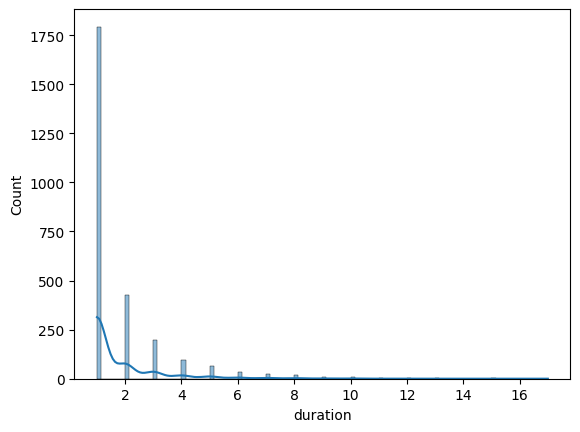

In [ ]:
sns.histplot(data=df_tv_,x="duration",kde=True)

**INSIGHTS**


*  For overall timeline (2008-2021), Movies are usually preferred over TV Shows by people all over the world. This may be because the Movie is one time watch and TV shows have new episodes every week for 2-3 months.

*   Over the time, people preferences are changing from Movies to Tv shows. There is rise in Tv show content while decline is observed in movies_content being added to platform in recent years.

*   Netflix dataset has 127 unique countries content added to it till 2021. The country column information for many movies/TV shows is missing in the dataset (831 country values out of 8807 rows are NaN).

*   There are 4994 unique directors from 127 countries. There are 2634 rows with NaN values which is 30% of content for which director information is missing.

*   Indian Actors are very popular. Anupam Kher followed by Shah Rukh Khan, are the top two actors. Most of the credits are in name of Indian Actors.

*   The content is getting increased over years. Netflix has started streaming online in year 2007 and hence there is not much content till 2015. After 2016, there is upsurge in content on Netflix. However during Corona Pandemic, there is decline in year in 2020 and 2021. Otherwise it is upward trend.

*   Most of the content is TV-MA (for adults) rated. This is
for movies and TV shows collectively.

*   International Movies is most listed genre followed by Dramas and Comedies. It is difficult to say much as a movie can be listed in multiple genres.

*  Most of the content is from USA and hence it can be inferred that most revenue comes from USA. Indian content other than Bollywood movies is not listed. Southern Indian Cinema has many great movies and is not listed on Netflix.

*  Many countries do not have TV shows content listed on Netflix.


*  Most of the movies are added within the year of release. Forty-six of the movies available are very old movies(released 50 years ago or more). The oldest movie available are from 1942.

*   Best time to time content is Holiday Season: December, New Year and Summer Break.
For India in particularly, October- November are also good to add content.
* Most of the movies have duration between  90 and 110 mins.
Most of TV shows have only 1 season.







### **Recommendations:**


* Data Quality Improvements:
 Address the missing data entries across various columns. Consider imputation techniques or data cleaning methods to minimize potential biases and ensure accurate analysis. Standardized data collection templates can be helpful in future data collection efforts.
Content Acquisition Strategy:

* Balance Content Investment: Analyze viewership patterns to determine the optimal investment balance between movies and TV shows. While acknowledging the current preference for movies, consider capitalizing on the rising interest in TV shows.

* Global Content Expansion:  Move beyond a US-centric content library. Actively seek and acquire TV shows and movies from a wider range of countries (including the 68 currently missing) to cater to a more global audience.

* Indian Market Focus:  Target the diverse Indian market. Expand the content library to include TV shows and movies from various Indian regions, catering to the country's linguistic diversity and capturing a larger market share.

* Data Enrichment:
  Include full release dates (year, month, day) for each piece of content. This richer data will facilitate more detailed analysis of seasonal trends, content performance over time, and potentially audience preferences based on release timing.

* Content Performance Indicators:  Expand the dataset to include customer ratings, revenue generated, budget information, and awards won for movies and TV shows.  These additional metrics will provide deeper insights into audience preferences, actor and director performance, and overall content profitability.

### Benefits:

By implementing these recommendations, Netflix can:

* Enhance Data Quality: Improve the reliability and accuracy of future analyses.
* Optimize Content Strategy: Make data-driven decisions regarding content acquisition and investment.
* Expand Market Reach: Attract a wider global audience by catering to diverse preferences.
* Gain Deeper Content Insights: Understand audience preferences, actor and director performance, and content profitability.




